In [1226]:
import numpy as np
import pandas as pd
import itertools 
import matplotlib.pyplot as plt

In [1227]:
df_bancolombia = pd.read_csv("bancolombia.csv")
df_bancolombia

,Date,Price,Open,High,Low,Vol.,Change %
0,12/28/2023,"33,200.0","32,880.0","33,200.0","32,800.0",63.78K,0.91%
1,12/27/2023,"32,900.0","32,280.0","32,900.0","32,280.0",127.93K,1.86%
2,12/26/2023,"32,300.0","31,900.0","32,300.0","31,860.0",62.79K,0.31%
3,12/22/2023,"32,200.0","31,880.0","32,300.0","31,640.0",46.85K,-0.31%
4,12/21/2023,"32,300.0","31,800.0","32,300.0","31,540.0",137.91K,1.57%
...,...,...,...,...,...,...,...
967,01/09/2020,"43,300.0","43,500.0","43,500.0","42,500.0",112.47K,-0.37%
968,01/08/2020,"43,460.0","44,480.0","44,480.0","42,580.0",146.91K,-0.78%
969,01/07/2020,"43,800.0","44,180.0","44,180.0","43,540.0",72.68K,-1.13%
970,01/03/2020,"44,300.0","44,360.0","44,360.0","43,900.0",151.96K,-0.18%


# Preprocesamiento

In [1228]:
df_bancolombia = df_bancolombia.drop(columns=['Open','High','Low','Vol.'])

new_col = []
for percentage in df_bancolombia['Change %']:
    new_col.append(float(percentage.strip('%')))
df_bancolombia = df_bancolombia.drop(columns=['Change %'])
df_bancolombia.insert(2, 'Change%', new_col, True)

In [1229]:
df_bancolombia['Change%']

0      0.91
1      1.86
2      0.31
3     -0.31
4      1.57
       ... 
967   -0.37
968   -0.78
969   -1.13
970   -0.18
971    0.86
Name: Change%, Length: 972, dtype: float64

# Definición de estados

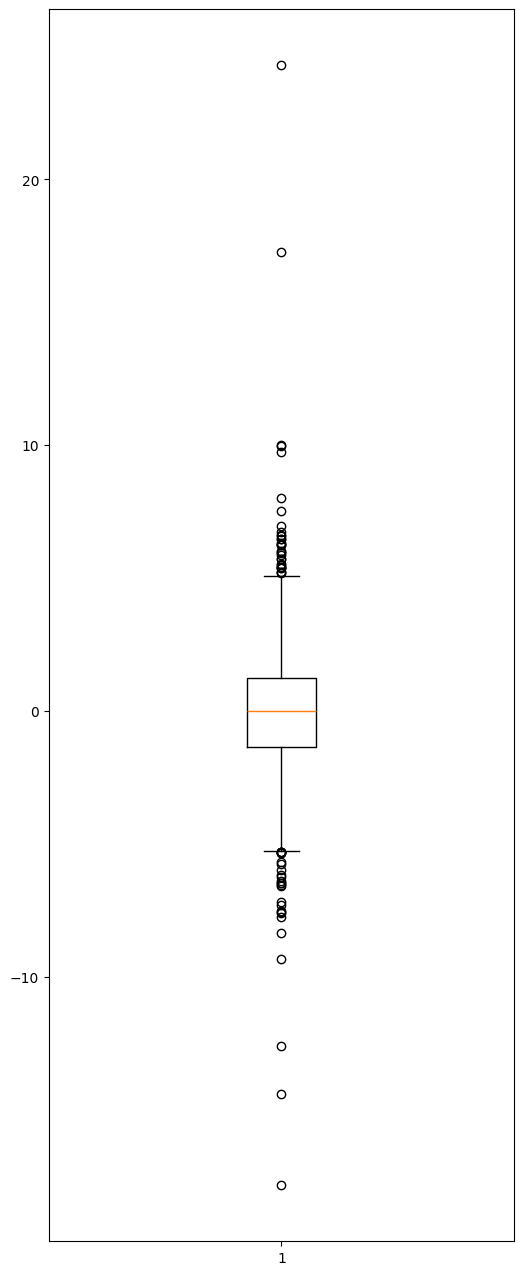

In [1230]:
plt.figure(figsize=(6, 16))
plt.boxplot(df_bancolombia['Change%'])

plt.show()

In [1231]:
#8 estados, por desviacion general - RECHAZADA
new_col = []
desviacion = np.std(df_bancolombia['Change%'])

for percentage in df_bancolombia['Change%']:
    if percentage > (3 * desviacion):
        new_col.append('S4')
    elif percentage > (2 * desviacion):
        new_col.append('S3')
    elif percentage > desviacion:
        new_col.append('S2')
    elif percentage > 0:
        new_col.append('S1')
    elif percentage > -(desviacion):
        new_col.append('B1')
    elif percentage > -(2 * desviacion):
        new_col.append('B2')
    elif percentage > -(3 * desviacion):
        new_col.append('B3')
    else:
        new_col.append('B4')
#df_bancolombia.insert(2, 'Estado', new_col, True)

In [1232]:
#8 estados, por desviacion local - ACEPTADA
new_col = []
l = 30
data = df_bancolombia['Change%']

for i, percentage in enumerate(data):
    min = int(i - l/2)
    max = int(i + l/2)
    if(i <= l/2):
        min = 0
        max = l
    elif(i >= len(data) - (l/2)):
        min = len(data) - l
        max = len(data)
        
    desviacion = np.std(data[min:max])

    if percentage > (3 * desviacion):
        new_col.append('S4')
    elif percentage > (2 * desviacion):
        new_col.append('S3')
    elif percentage > desviacion:
        new_col.append('S2')
    elif percentage > 0:
        new_col.append('S1')
    elif percentage > -(desviacion):
        new_col.append('B1')
    elif percentage > -(2 * desviacion):
        new_col.append('B2')
    elif percentage > -(3 * desviacion):
        new_col.append('B3')
    else:
        new_col.append('B4')
#df_bancolombia.insert(2, 'Estado', new_col, True)

In [1233]:
#6 estados, por desviacion local - ACEPTADA
new_col = []
l = 20
data = df_bancolombia['Change%']

for i, percentage in enumerate(data):
    min = int(i - l/2)
    max = int(i + l/2)
    if(i <= l/2):
        min = 0
        max = l
    elif(i >= len(data) - (l/2)):
        min = len(data) - l
        max = len(data)
        
    desviacion = np.std(data[min:max])

    if percentage > (2 * desviacion):
        new_col.append('S3')
    elif percentage > desviacion:
        new_col.append('S2')
    elif percentage > 0:
        new_col.append('S1')
    elif percentage > -(desviacion):
        new_col.append('B1')
    elif percentage > -(2 * desviacion):
        new_col.append('B2')
    else:
        new_col.append('B3')
#df_bancolombia.insert(2, 'Estado', new_col, True)

In [1234]:
#5 estados, interpretacion de la grafica de caja y bigotes - ACEPTADA
new_col = []
for percentage in df_bancolombia['Change%']:
    if percentage > 5:
        new_col.append('Sube+')
    elif percentage > 1:
        new_col.append('Sube')
    elif percentage > -1:
        new_col.append('Estable')
    elif percentage > -5:
        new_col.append('Baja')
    else:
        new_col.append('Baja+')
df_bancolombia.insert(2, 'Estado', new_col, True)

In [1235]:
#5 estados, por desviacion general - RECHAZADA
new_col = []
l = 20
data = df_bancolombia['Change%']
desviacion = np.std(data)

for i, percentage in enumerate(data):
    if percentage > (2 * desviacion):
        new_col.append('Sube+')
    elif percentage > (desviacion/2):
        new_col.append('Sube')
    elif percentage > -(desviacion/2):
        new_col.append('Estable')
    elif percentage > -(2 * desviacion):
        new_col.append('Baja')
    else:
        new_col.append('Baja+')
#df_bancolombia.insert(2, 'Estado', new_col, True)

In [1236]:
#5 estados, por desviacion local - ACEPTADA
new_col = []
l = 20
data = df_bancolombia['Change%']

for i, percentage in enumerate(data):
    min = int(i - l/2)
    max = int(i + l/2)
    if(i <= l/2):
        min = 0
        max = l
    elif(i >= len(data) - (l/2)):
        min = len(data) - l
        max = len(data)
        
    desviacion = np.std(data[min:max])
    if percentage > (2 * desviacion):
        new_col.append('Sube+')
    elif percentage > (desviacion/2):
        new_col.append('Sube')
    elif percentage > -(desviacion/2):
        new_col.append('Estable')
    elif percentage > -(2 * desviacion):
        new_col.append('Baja')
    else:
        new_col.append('Baja+')
#df_bancolombia.insert(2, 'Estado', new_col, True)

In [1237]:
df_bancolombia

,Date,Price,Estado,Change%
0,12/28/2023,"33,200.0",Estable,0.91
1,12/27/2023,"32,900.0",Sube,1.86
2,12/26/2023,"32,300.0",Estable,0.31
3,12/22/2023,"32,200.0",Estable,-0.31
4,12/21/2023,"32,300.0",Sube,1.57
...,...,...,...,...
967,01/09/2020,"43,300.0",Estable,-0.37
968,01/08/2020,"43,460.0",Estable,-0.78
969,01/07/2020,"43,800.0",Baja,-1.13
970,01/03/2020,"44,300.0",Estable,-0.18


In [1238]:
#estados_posibles = ['B4','B3','B2','B1','S1','S2','S3','S4']
#estados_posibles = ['B3','B2','B1','S1','S2','S3']
estados_posibles = ['Baja+','Baja','Estable','Sube','Sube+']

total_cols = len(estados_posibles)
total_rows = total_cols*total_cols

In [1239]:
estados = np.array(df_bancolombia['Estado'])

markovian_table = np.array(estados)
estados = np.delete(estados, 0)
estados = np.append(estados, 0)
markovian_table = np.vstack([markovian_table,estados])
estados = np.delete(estados, 0)
estados = np.append(estados, 0)
markovian_table = np.vstack([markovian_table,estados])

markovian_table = markovian_table.T
markovian_table = np.delete(markovian_table, [-1, -2], axis=0)
markovian_table 

array([['Estable', 'Sube', 'Estable'],
       ['Sube', 'Estable', 'Estable'],
       ['Estable', 'Estable', 'Sube'],
       ...,
       ['Estable', 'Estable', 'Baja'],
       ['Estable', 'Baja', 'Estable'],
       ['Baja', 'Estable', 'Estable']], dtype=object)

In [1240]:
expected_freq = [[0] * (total_cols + 1) for i in range(total_cols)]

for i in range(len(markovian_table)):
    actual = markovian_table[i][1]
    row_index = estados_posibles.index(actual)
    col_index = estados_posibles.index(markovian_table[i][2])

    expected_freq[row_index][col_index] += 1
    expected_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
expected_freq_df = pd.DataFrame(expected_freq, columns=cols)
cols.pop(-1)
expected_freq_df.insert(0, 'T_Actual', cols)
expected_freq_df

,T_Actual,Baja+,Baja,Estable,Sube,Sube+,Recuento
0,Baja+,2,12,9,6,3,32
1,Baja,8,71,116,67,11,273
2,Estable,10,117,168,87,8,390
3,Sube,7,63,88,73,8,239
4,Sube+,5,10,10,5,6,36


In [1241]:
invalid_counter = 0

for i in range(total_cols):
    for j in range(1,total_cols + 1):
        if expected_freq_df.iat[i, j] < 5:
            invalid_counter += 1
            
cumple_empirica = invalid_counter < 0.25 * (total_cols ** 2)
print(f'Cumple la empírica? RTA: {cumple_empirica}') 

Cumple la empírica? RTA: True


# Modelo - Matriz de transición

In [1242]:
model_freq = [[0] * total_cols for i in range(total_cols)]
total_freq = [0,0,0,0,0,0,0,0]

for i in range(len(markovian_table)):
    actual = markovian_table[i][1]
    row_index = estados_posibles.index(actual)
    col_index = estados_posibles.index(markovian_table[i][2])

    model_freq[row_index][col_index] += 1
    total_freq[row_index] += 1

model_transition_prob_df = pd.DataFrame(model_freq, columns=estados_posibles)
model_transition_prob_df.insert(0, 'Actual', estados_posibles)

for i in range(total_cols):
    for j in range(1,total_cols+1):
        model_transition_prob_df.iat[i, j] = (model_transition_prob_df.iat[i, j]/total_freq[i]).astype(float)

model_transition_prob_df

C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_20340\746005964.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  model_transition_prob_df.iat[i, j] = (model_transition_prob_df.iat[i, j]/total_freq[i]).astype(float)
C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_20340\746005964.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  model_transition_prob_df.iat[i, j] = (model_transition_prob_df.iat[i, j]/total_freq[i]).astype(float)
C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_20340\746005964.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.28125' 

,Actual,Baja+,Baja,Estable,Sube,Sube+
0,Baja+,0.062500,0.375000,0.281250,0.187500,0.093750
1,Baja,0.029304,0.260073,0.424908,0.245421,0.040293
2,Estable,0.025641,0.300000,0.430769,0.223077,0.020513
3,Sube,0.029289,0.263598,0.368201,0.305439,0.033473
4,Sube+,0.138889,0.277778,0.277778,0.138889,0.166667


# Propiedad Markoviana

In [1243]:
observed_rows = list(itertools.product(estados_posibles,repeat=2))

observed_freq = [[0] * (total_cols + 1) for i in range(total_rows)]

for i in range(len(markovian_table)):
    history = (markovian_table[i][0],markovian_table[i][1])
    row_index = observed_rows.index(history)
    col_index = estados_posibles.index(markovian_table[i][2])

    observed_freq[row_index][col_index] += 1
    observed_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
observed_freq_df = pd.DataFrame(observed_freq, columns=cols)
observed_freq_df.insert(0, 'History', observed_rows)
observed_freq_df

,History,Baja+,Baja,Estable,Sube,Sube+,Recuento
0,"(Baja+, Baja+)",0,0,0,2,0,2
1,"(Baja+, Baja)",2,4,5,1,0,12
2,"(Baja+, Estable)",2,3,1,3,0,9
3,"(Baja+, Sube)",1,0,3,2,0,6
4,"(Baja+, Sube+)",0,0,3,0,0,3
5,"(Baja, Baja+)",0,3,3,0,2,8
6,"(Baja, Baja)",1,18,31,20,1,71
7,"(Baja, Estable)",2,34,53,24,3,116
8,"(Baja, Sube)",5,18,25,15,4,67
9,"(Baja, Sube+)",1,3,3,2,2,11


In [1244]:
observed_prob_df = observed_freq_df.copy()
for i in range(total_rows):
    for j in range(1,total_cols+1):
        if observed_prob_df.iat[i, total_cols+1] == 0:
            observed_prob_df.iat[i, j] = 0
        else:
            observed_prob_df.iat[i, j] = (observed_prob_df.iat[i, j]/observed_prob_df.iat[i, total_cols+1]).astype(float)

observed_prob_df = observed_prob_df.drop(columns=['Recuento'], axis=1)
observed_prob_df

C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_20340\1372542959.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.16666666666666666' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_df.iat[i, j] = (observed_prob_df.iat[i, j]/observed_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_20340\1372542959.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3333333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_df.iat[i, j] = (observed_prob_df.iat[i, j]/observed_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_20340\1372542959.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a 

,History,Baja+,Baja,Estable,Sube,Sube+
0,"(Baja+, Baja+)",0.000000,0.000000,0.000000,1.000000,0.000000
1,"(Baja+, Baja)",0.166667,0.333333,0.416667,0.083333,0.000000
2,"(Baja+, Estable)",0.222222,0.333333,0.111111,0.333333,0.000000
3,"(Baja+, Sube)",0.166667,0.000000,0.500000,0.333333,0.000000
4,"(Baja+, Sube+)",0.000000,0.000000,1.000000,0.000000,0.000000
5,"(Baja, Baja+)",0.000000,0.375000,0.375000,0.000000,0.250000
6,"(Baja, Baja)",0.014085,0.253521,0.436620,0.281690,0.014085
7,"(Baja, Estable)",0.017241,0.293103,0.456897,0.206897,0.025862
8,"(Baja, Sube)",0.074627,0.268657,0.373134,0.223881,0.059701
9,"(Baja, Sube+)",0.090909,0.272727,0.272727,0.181818,0.181818


In [1245]:
expected_freq = [[0] * (total_cols + 1) for i in range(total_cols)]

for i in range(len(markovian_table)):
    actual = markovian_table[i][1]
    row_index = estados_posibles.index(actual)
    col_index = estados_posibles.index(markovian_table[i][2])

    expected_freq[row_index][col_index] += 1
    expected_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
expected_freq_df = pd.DataFrame(expected_freq, columns=cols)
cols.pop(-1)
expected_freq_df.insert(0, 'History', cols)
expected_freq_df

,History,Baja+,Baja,Estable,Sube,Sube+,Recuento
0,Baja+,2,12,9,6,3,32
1,Baja,8,71,116,67,11,273
2,Estable,10,117,168,87,8,390
3,Sube,7,63,88,73,8,239
4,Sube+,5,10,10,5,6,36


In [1246]:
expected_prob_df = expected_freq_df.copy()
for i in range(total_cols):
    for j in range(1,total_cols+1):
        expected_prob_df.iat[i, j] = (expected_prob_df.iat[i, j]/expected_prob_df.iat[i, total_cols+1]).astype(float)

expected_prob_df = expected_prob_df.drop(columns=['Recuento'], axis=1)
expected_prob_df

C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_20340\1491194249.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  expected_prob_df.iat[i, j] = (expected_prob_df.iat[i, j]/expected_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_20340\1491194249.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  expected_prob_df.iat[i, j] = (expected_prob_df.iat[i, j]/expected_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_20340\1491194249.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. 

,History,Baja+,Baja,Estable,Sube,Sube+
0,Baja+,0.062500,0.375000,0.281250,0.187500,0.093750
1,Baja,0.029304,0.260073,0.424908,0.245421,0.040293
2,Estable,0.025641,0.300000,0.430769,0.223077,0.020513
3,Sube,0.029289,0.263598,0.368201,0.305439,0.033473
4,Sube+,0.138889,0.277778,0.277778,0.138889,0.166667


In [1247]:
chi_values = []
k = 0

for i in range(total_rows):
    for j in range(1,total_cols+1):
        if expected_prob_df.iat[k,j] == 0:
            chi_parcial = (0)
        else: 
            chi_parcial = observed_freq_df.iat[i,total_cols+1] * ((observed_prob_df.iat[i,j] - expected_prob_df.iat[k,j]) ** 2) / expected_prob_df.iat[k,j]

        chi_values.append(chi_parcial)

    k += 1
    if k == total_cols:
        k = 0

chi_observado = sum(chi_values)
chi_observado

116.05462705906022

In [1248]:
from scipy.stats.distributions import chi2

alpha = 0.01
rows = total_rows
cols = total_cols
grados = (rows - 1)*(cols - 1)

chi_teorico = chi2.ppf(1 - alpha, df=grados)
chi_teorico

131.141216667052

In [1249]:
is_not_markovian = chi_observado >= chi_teorico
print(f'Se rechaza la cadena (no es markoviana)? RTA: {is_not_markovian}')

Se rechaza la cadena (no es markoviana)? RTA: False


# Propiedad Estacionaria

Definiremos los periodos de tiempo como años

In [1250]:
new_col = []
for date in df_bancolombia['Date']:
    if '2020' in date:
        new_col.append(1)
    elif '2021' in date:
        new_col.append(2)
    elif '2022' in date:
        new_col.append(3)
    else:
        new_col.append(4)
df_bancolombia.insert(2, 'Periodo', new_col, True)

df_bancolombia

,Date,Price,Periodo,Estado,Change%
0,12/28/2023,"33,200.0",4,Estable,0.91
1,12/27/2023,"32,900.0",4,Sube,1.86
2,12/26/2023,"32,300.0",4,Estable,0.31
3,12/22/2023,"32,200.0",4,Estable,-0.31
4,12/21/2023,"32,300.0",4,Sube,1.57
...,...,...,...,...,...
967,01/09/2020,"43,300.0",1,Estable,-0.37
968,01/08/2020,"43,460.0",1,Estable,-0.78
969,01/07/2020,"43,800.0",1,Baja,-1.13
970,01/03/2020,"44,300.0",1,Estable,-0.18


In [1251]:
periodos = np.array(df_bancolombia['Periodo'])
estados = np.array(df_bancolombia['Estado'])

stationary_table = np.array(periodos)
stationary_table = np.vstack([stationary_table, estados])
estados = np.delete(estados, 0)
estados = np.append(estados, 0)
stationary_table = np.vstack([stationary_table, estados])

stationary_table = stationary_table.T
stationary_table = np.delete(stationary_table, -1, axis=0)
stationary_table 

array([[4, 'Estable', 'Sube'],
       [4, 'Sube', 'Estable'],
       [4, 'Estable', 'Estable'],
       ...,
       [1, 'Estable', 'Baja'],
       [1, 'Baja', 'Estable'],
       [1, 'Estable', 'Estable']], dtype=object)

In [1252]:
observed_rows = list(itertools.product([1,2,3,4], estados_posibles))

observed_freq = [[0] * (total_cols + 1) for i in range(len(observed_rows))]

for i in range(len(markovian_table)):
    history = (stationary_table[i][0], stationary_table[i][1])
    row_index = observed_rows.index(history)
    col_index = estados_posibles.index(stationary_table[i][2])

    observed_freq[row_index][col_index] += 1
    observed_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
observed_freq_stat_df = pd.DataFrame(observed_freq, columns=cols)
observed_freq_stat_df.insert(0, 'History', observed_rows)
observed_freq_stat_df

,History,Baja+,Baja,Estable,Sube,Sube+,Recuento
0,"(1, Baja+)",1,7,4,2,2,16
1,"(1, Baja)",6,17,23,17,4,67
2,"(1, Estable)",4,25,27,23,3,82
3,"(1, Sube)",3,12,24,17,4,60
4,"(1, Sube+)",2,6,4,1,2,15
5,"(2, Baja+)",0,1,0,1,0,2
6,"(2, Baja)",0,20,34,16,2,72
7,"(2, Estable)",1,30,56,23,0,110
8,"(2, Sube)",1,19,20,16,1,57
9,"(2, Sube+)",0,2,0,1,1,4


In [1253]:
observed_prob_stat_df = observed_freq_stat_df.copy()
for i in range(len(observed_rows)):
    for j in range(1,total_cols+1):
        if observed_prob_stat_df.iat[i, total_cols+1] == 0:
            observed_prob_stat_df.iat[i, j] = 0
        else:
            observed_prob_stat_df.iat[i, j] = (observed_prob_stat_df.iat[i, j]/observed_prob_stat_df.iat[i, total_cols+1]).astype(float)

observed_prob_stat_df = observed_prob_stat_df.drop(columns=['Recuento'], axis=1)
observed_prob_stat_df

C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_20340\1821551178.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_stat_df.iat[i, j] = (observed_prob_stat_df.iat[i, j]/observed_prob_stat_df.iat[i, total_cols+1]).astype(float)
C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_20340\1821551178.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_stat_df.iat[i, j] = (observed_prob_stat_df.iat[i, j]/observed_prob_stat_df.iat[i, total_cols+1]).astype(float)
C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_20340\1821551178.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error 

,History,Baja+,Baja,Estable,Sube,Sube+
0,"(1, Baja+)",0.062500,0.437500,0.250000,0.125000,0.125000
1,"(1, Baja)",0.089552,0.253731,0.343284,0.253731,0.059701
2,"(1, Estable)",0.048780,0.304878,0.329268,0.280488,0.036585
3,"(1, Sube)",0.050000,0.200000,0.400000,0.283333,0.066667
4,"(1, Sube+)",0.133333,0.400000,0.266667,0.066667,0.133333
5,"(2, Baja+)",0.000000,0.500000,0.000000,0.500000,0.000000
6,"(2, Baja)",0.000000,0.277778,0.472222,0.222222,0.027778
7,"(2, Estable)",0.009091,0.272727,0.509091,0.209091,0.000000
8,"(2, Sube)",0.017544,0.333333,0.350877,0.280702,0.017544
9,"(2, Sube+)",0.000000,0.500000,0.000000,0.250000,0.250000


In [1254]:
expected_prob_df

,History,Baja+,Baja,Estable,Sube,Sube+
0,Baja+,0.062500,0.375000,0.281250,0.187500,0.093750
1,Baja,0.029304,0.260073,0.424908,0.245421,0.040293
2,Estable,0.025641,0.300000,0.430769,0.223077,0.020513
3,Sube,0.029289,0.263598,0.368201,0.305439,0.033473
4,Sube+,0.138889,0.277778,0.277778,0.138889,0.166667


In [1255]:
chi_values = []
k = 0

for i in range(len(observed_rows)):
    for j in range(1,total_cols+1):
        if expected_prob_df.iat[k,j] == 0:
            chi_parcial = 0
        else: 
            chi_parcial = observed_freq_stat_df.iat[i,total_cols+1] * ((observed_prob_stat_df.iat[i,j] - expected_prob_df.iat[k,j]) ** 2) / expected_prob_df.iat[k,j]

        chi_values.append(chi_parcial)

    k += 1
    if k == total_cols:
        k = 0

chi_stat_observado = sum(chi_values)
chi_stat_observado

58.408083991191965

In [1256]:
is_not_stationary = chi_stat_observado >= chi_teorico
print(f'La cadena no cumple la propiedad estacionaria? RTA: {is_not_stationary}')

La cadena no cumple la propiedad estacionaria? RTA: False
